In [1]:
from pyincore import IncoreClient
from pyincore.analyses.buildingdamage import BuildingDamage

In [2]:
# Connect to IN-CORE service
client = IncoreClient()

### Building damage for Shelby county, TN with New Madrid earthquake

In [3]:
# New madrid earthquake using Atkinson Boore 1995
hazard_type = "earthquake"
hazard_id = "5b902cb273c3371e1236b36b"

# Building inventory in Shelby county, TN
bldg_dataset_id = "5a284f0bc7d30d13bc081a28"

# Default Building Fragility mapping
mapping_id = "5b47b350337d4a3629076f2c"

In [4]:
# Create building damage
bldg_dmg = BuildingDamage(client)

# Load input dataset
bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)

# Specify the result name
result_name = "memphis_bldg_dmg_result"

# Set analysis parameters
bldg_dmg.set_parameter("result_name", result_name)
bldg_dmg.set_parameter("mapping_id", mapping_id)
bldg_dmg.set_parameter("hazard_type", hazard_type)
bldg_dmg.set_parameter("hazard_id", hazard_id)
bldg_dmg.set_parameter("num_cpu", 10)

Dataset already exists locally. Reading from local cache.


True

In [5]:
# Run building damage analysis
bldg_dmg.run_analysis()

True

In [6]:
# Retrieve result dataset
result = bldg_dmg.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
df = result.get_dataframe_from_csv()

# Display top 5 rows of output data
df.head()

,guid,immocc,lifesfty,collprev,insignific,moderate,heavy,complete,demandtype,hazardval
0,a41e7dcc-3b82-42f2-9dbd-a2ebdf39d453,0.848146,0.327319,2.722903e-02,0.151854,0.520828,0.300089,2.722903e-02,PGA,0.309996
1,254d1dd8-5d2f-4737-909b-59cc64ca72d4,0.844340,0.328296,2.860487e-02,0.155660,0.516045,0.299691,2.860487e-02,PGA,0.309996
2,4253802e-b3e5-4ed3-93b0-dda9ef6362b0,0.896775,0.480926,8.756764e-02,0.103225,0.415849,0.393358,8.756764e-02,PGA,0.308425
3,b185d5b6-5bc0-43a3-800a-c046017372ab,0.810564,0.331283,4.895657e-02,0.189436,0.479281,0.282327,4.895657e-02,PGA,0.299533
4,7b5dc4f6-ef5e-4178-9836-f044b4b92f0d,0.970342,0.154675,7.649816e-11,0.029658,0.815668,0.154675,7.649816e-11,Sa,0.237687


### Creating a chart

Text(0, 0.5, 'counts')

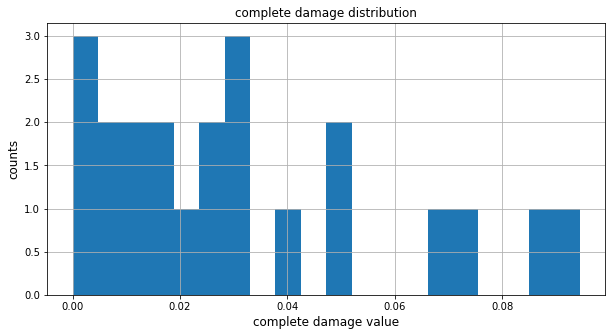

In [7]:
ax = df['complete'].hist(bins=20, figsize=[10,5])
ax.set_title("complete damage distribution", fontsize=12)
ax.set_xlabel("complete damage value", fontsize=12)
ax.set_ylabel("counts", fontsize=12)